<a href="https://colab.research.google.com/github/alexandergribenchenko/estudio/blob/main/Prueba_GitHub_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Nueva sección

In [ ]:
#!pip install unidecode

     |████████████████████████████████| 245kB 4.8MB/s 


In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:


%matplotlib inline

# Librerias incluidas de manera personal
import re
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn

#from unidecode import unidecode


# Librerias incluidas por defecto en el extended case
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

try:
    tf.set_random_seed(1337)                    # set the random seed for reproducibility
except:
    tf.random.set_seed(1337)                     # NOTE: Newer version aaof tensorflow uses tf.random.set_seed
np.random.seed(1337)                         #       instead of tf.set_random_seed

from nltk.corpus import stopwords

In [ ]:
segment = 'E'

In [ ]:
test_sequences = np.load('/content/drive/My Drive/datos_model/test_sequences_{}.npy'.format(segment))

# train_sequences = np.load('/content/drive/My Drive/datos_model/train_sequences_{}.npy'.format(segment))

# y_train = pd.read_csv('/content/drive/My Drive/datos_model/y_train_{}.csv'.format(segment), usecols=['target'])
y_test = pd.read_csv('/content/drive/My Drive/datos_model/y_test_{}.csv'.format(segment), usecols=['target'])

In [ ]:
y_test.nunique()

target    16
dtype: int64

In [ ]:
## n
num_neurons = y_train.target.nunique()

In [ ]:
emb_size = len(train_sequences[0])

In [ ]:
# Modelo de Neural Networks con las especificaciones arriba descritas
# (modelo incluido por defecto en el extended case)

# Paso 01ameameame. Se instancia el modelo empleando Sequential de keras
# (vi8315ene de from tensorflow.keras.models import Sequential)
model = Sequential()

# Paso 02. Se genera una capa para el embedding (one hot encoding)
model.add(Embedding(120000, 256, input_length=emb_size))

# Paso 03. Se generan 2 capas con 128 neuronas cada una
# - Dense: hace referencia a que todas las neuronas estaran conectadas en dicha capa.
# - Cantidad de neuronas: 128 cada una
# - Función de activación: relu (bajo cero es cero, y despues y = x)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Paso 03. XXX
model.add(GlobalMaxPooling1D())

# Paso 04. Se genera 1 capa de salida con 5 neuronas
# - Dense: hace referencia a que todas las neuronas estaran conectadas en dicha capa.
# - Cantidad de neuronas: 128 cada una
# - Función de activación: sigmoid (tal como en la regresión logística, estima 0 o 1 a partir de probabilidad)
model.add(Dense(num_neurons, activation='softmax'))

# Paso 05. Se compila el modelo generado enpleando 
# - loss: hace referencia a la función de perdida.
# - optimizer: adam por defecto
# - metrics: accuracy en este caso, pero puede elegirse la métrics propia de interes.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# A partir del modelo compilado, generamos su entrenamiento a partir 
# de los train_sequences y se , force_remount=Truesus targets asociados (ambos asociados a datos de entrenamiento)
# (linea incluida por defecto en el extended case)
# - validation_split: entrenarnará y vvalidara con una relación de datos de este porcentaje.
# - epochs: cantidad de iteraciones que hara para hacer el ajuste de los w de la red

model.fit(train_sequences, y_train, validation_split=0.2, epochs=10, batch_size = 1024,
               callbacks=[EarlyStopping(monitor='val_accuracy', mode='auto', restore_best_weights=True, patience = 2)])

Epoch 1/10
3843/3843 [==============================] - 1945s 506ms/step - loss: 0.2162 - accuracy: 0.9310 - val_loss: 0.1928 - val_accuracy: 0.9368
Epoch 2/10
3843/3843 [==============================] - 1910s 497ms/step - loss: 0.1808 - accuracy: 0.9401 - val_loss: 0.1876 - val_accuracy: 0.9385
Epoch 3/10
3843/3843 [==============================] - 1910s 497ms/step - loss: 0.1688 - accuracy: 0.9437 - val_loss: 0.1875 - val_accuracy: 0.9384
Epoch 4/10
3843/3843 [==============================] - 1925s 501ms/step - loss: 0.1601 - accuracy: 0.9462 - val_loss: 0.1875 - val_accuracy: 0.9383


In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### guarda el modelo con el, 
model.save(filepath='/content/drive/My Drive/datos_model/group_{}3layers'.format(segment),save_format='h5')

In [ ]:
# Carga el modelo que se va a usar para generar las metricas
model = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_{}.h5'.format(segment))##/content/drive/My Drive/datos_model/group_B.h5

In [ ]:
# Generemos la predicción del modelo para nuestro conjunto de test
y_predict = model.predict_classes(test_sequences)



NameError: ignored

In [ ]:
# Crea la matriz de confusión
conf_mat = confusion_matrix(y_test, y_predict)

In [ ]:
# Valores para normalizar la matriz respecto a la cantidad de valores reales
number_y_real = np.array([int((y_test == val).sum()) for val in sorted(y_test.target.unique())])

In [ ]:
## crea la matriz de confusion normalizada
conf_matrix = []
for i, val in enumerate(number_y_real):
    conf_matrix.append(conf_mat[i]/val)

Text(0.5, 51.0, 'pred')

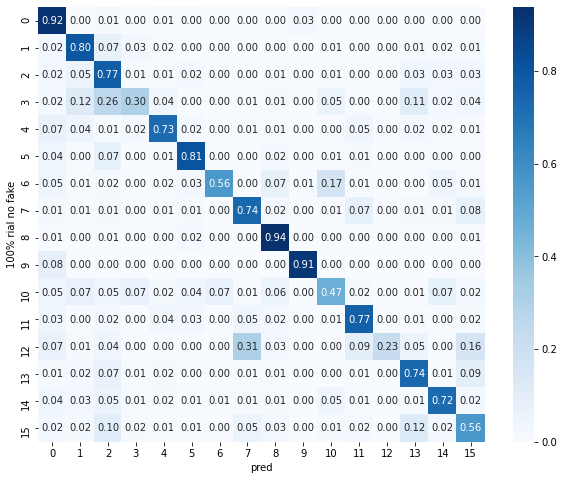

In [ ]:
# Grafiquemos la matriz de confusión normalizada en un heatmap para identificar 
# de manera mas clara donde se focalizan los aciertos y donde los errores
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt=".2f",  cmap="Blues")
plt.ylabel('100% rial no fake')
plt.xlabel('pred')

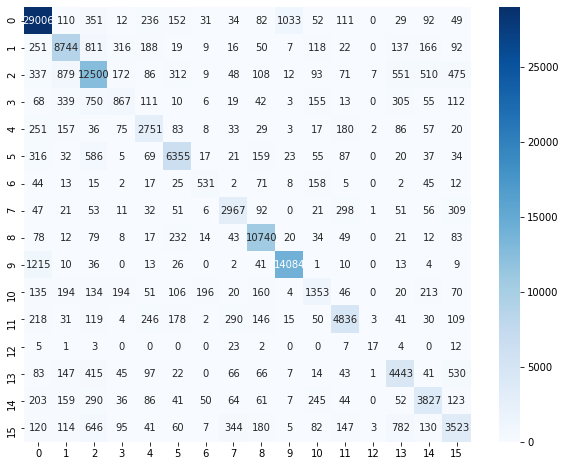

In [ ]:
# Grafiquemos la matriz de confusión en un heatmap para identificar 
# de manera mas clara donde se focalizan los aciertos y donde los errores
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d",  cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(y_predict, y_test))

accuracy 0.9400717869717952
              precision    recall  f1-score   support

           0       0.55      0.78      0.65      2530
           1       0.58      0.73      0.65     12454
           2       0.46      0.65      0.54      8721
           3       0.60      0.71      0.65     27945
           4       0.87      0.81      0.84    141094
           5       0.98      0.97      0.98   1029284
           6       0.39      0.70      0.50      7443

    accuracy                           0.94   1229471
   macro avg       0.63      0.76      0.69   1229471
weighted avg       0.95      0.94      0.94   1229471



In [ ]:
model_group = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_groups.h5')
model_b = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_B.h5')
model_c = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_C.h5')
model_d = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_D.h5')
model_e = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_E.h5')
model_f = tf.keras.models.load_model('/content/drive/My Drive/datos_model/group_F.h5')


In [ ]:
def get_group_orders(predictions):
    ## ordena mis predicciones de mayor a menor
    sorted_preds = sorted(predictions)[::-1]
    sorted_preds_index = []
    sorted_preds_index = [list(predictions).index(pred) for pred in sorted_preds]
    return sorted_preds_index

In [ ]:
def mod_metric(y_test,X_test):
    group_predictions = model_group.predict(X_test)

In [ ]:

y_test

,target
0,5
1,5
2,5
3,5
4,4
...,...
1229466,5
1229467,5
1229468,5
1229469,5


In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=7b6b769988a71e3dae8a90bbf8a1c2dd77e0a47a4b0a04729bdc07e7e12bb5af
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=4989c32ff40569d7f98fdd3563cf6c43f2921f1119db4d2a27b7390edb51de80
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def tune_nn_model(hp):

    model = keras.Sequential()

    model.add(keras.layers.Dense(units=128,

                                 activation="relu"))

    for i in range(hp.Int('num_layers', 1, 6)):
        

        units = hp.Int(

          'units_' + str(i),

          min_value=8,

          max_value=64,

          step=8

      )
        

        model.add(keras.layers.Dense(units=units, activation='relu'))

        drop_rate = hp.Choice('drop_rate_' + str(i),

                            [

                              0.0, 0.1, 0.2, 0.3, 0.4,

                              0.5, 0.6, 0.7, 0.8, 0.9

                            ])

        model.add(keras.layers.Dropout(rate=drop_rate))

    model.add(keras.layers.Dense(7, activation='sigmoid'))
USDUSD
    model.compile(

        optimizer="adam",

        loss = 'sparse_categorical_crossentropy',

        metrics = ['accuracy'])

    return model

In [ ]:
MAX_TRIALS = 15

EXECUTIONS_PER_TRIAL = 5

tuner = RandomSearch(

    tune_nn_model,

    objective='val_accuracy',

    max_trials=MAX_TRIALS,

    executions_per_trial=EXECUTIONS_PER_TRIAL,

    seed=42
)

In [ ]:
TRAIN_EPOCHS = 15

tuner.search(x=train_sequences,

             y=y_train,

             epochs=TRAIN_EPOCHS,

             validation_data=(test_sequences, y_test),
             batch_size = 1024,
             callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

Epoch 1/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.7461 - accuracy: 0.8195 - val_loss: 0.6596 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6596 - accuracy: 0.8294 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6596 - accuracy: 0.8295 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.7427 - accuracy: 0.8237 - val_loss: 0.6905 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6800 - accuracy: 0.8294 - val_loss: 0.6945 - val_ac

Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 1.6940 - accuracy: 0.1116 - val_loss: 1.6684 - val_accuracy: 0.1055
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.6958 - accuracy: 0.1646 - val_loss: 1.6604 - val_accuracy: 0.1101
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.7497 - accuracy: 0.2786 - val_loss: 1.7494 - val_accuracy: 0.2856
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.7799 - accuracy: 0.3436 - val_loss: 1.7608 - val_accuracy: 0.3118
Epoch 1/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.7082 - accuracy: 0.0913 - val_loss: 1.6625 - val_accuracy: 0.0586
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.7438 - accuracy: 0.2057 - val_loss: 1.8629 - val_accuracy: 0.4506
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.6887 - accuracy: 0.1252 - val_loss: 1.6723 - val_ac

Epoch 1/15
4803/4803 [==============================] - 30s 6ms/step - loss: 0.7370 - accuracy: 0.8269 - val_loss: 0.6595 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6598 - accuracy: 0.8294 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6658 - accuracy: 0.8294 - val_loss: 0.7995 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6656 - accuracy: 0.8294 - val_loss: 0.6717 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 30s 6ms/step - loss: 0.7356 - accuracy: 0.8269 - val_loss: 0.7890 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 30s 6ms/step - loss: 0.6677 - accuracy: 0.8293 - val_loss: 0.8668 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 31s 7ms/step - loss: 0.6658 - accuracy: 0.8294 - val_loss: 0.6973 - val_ac

Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.8117 - accuracy: 0.7291 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6596 - accuracy: 0.8294 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6596 - accuracy: 0.8294 - val_loss: 0.6590 - val_accuracy: 0.8297
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6596 - accuracy: 0.8295 - val_loss: 0.6597 - val_accuracy: 0.8290
Epoch 5/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6598 - accuracy: 0.8293 - val_loss: 0.6620 - val_accuracy: 0.8277
Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.7828 - accuracy: 0.7788 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6590 - val_ac

Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 1.0660 - accuracy: 0.5675 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 26s 6ms/step - loss: 0.6620 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6607 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6602 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.9712 - accuracy: 0.6494 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6619 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6605 - accuracy: 0.8294 - val_loss: 0.6589 - val_ac

Epoch 1/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.7167 - accuracy: 0.0433 - val_loss: 1.6637 - val_accuracy: 0.0754
Epoch 2/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.6621 - accuracy: 0.1403 - val_loss: 1.6590 - val_accuracy: 0.2214
Epoch 3/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.2522 - accuracy: 0.4907 - val_loss: 0.6595 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6596 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6594 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 6/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6588 - val_accuracy: 0.8297
Epoch 7/15
4803/4803 [==============================] - 24s 5ms/step - loss: 0.6594 - accuracy: 0.8295 - val_loss: 0.6586 - val_ac

Epoch 1/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.4076 - accuracy: 0.3005 - val_loss: 0.6593 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6587 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6677 - accuracy: 0.8283 - val_loss: 0.6587 - val_accuracy: 0.8297
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6613 - accuracy: 0.8291 - val_loss: 0.6587 - val_accuracy: 0.8297
Epoch 5/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6680 - accuracy: 0.8282 - val_loss: 0.6587 - val_accuracy: 0.8297
Epoch 6/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6690 - accuracy: 0.8295 - val_loss: 0.6593 - val_accuracy: 0.8297
Epoch 7/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6692 - accuracy: 0.8295 - val_loss: 0.6680 - val_ac

Epoch 1/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.8583 - accuracy: 0.7050 - val_loss: 0.6593 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6621 - accuracy: 0.8294 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6608 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6603 - accuracy: 0.8295 - val_loss: 0.6590 - val_accuracy: 0.8297
Epoch 5/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6600 - accuracy: 0.8295 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.9226 - accuracy: 0.6576 - val_loss: 0.6593 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6621 - accuracy: 0.8294 - val_loss: 0.6593 - val_ac

Epoch 1/15
4803/4803 [==============================] - 29s 6ms/step - loss: 1.0669 - accuracy: 0.6720 - val_loss: 0.6595 - val_accuracy: 0.8295
Epoch 2/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6615 - accuracy: 0.8294 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6601 - accuracy: 0.8294 - val_loss: 0.6594 - val_accuracy: 0.8294
Epoch 4/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6598 - accuracy: 0.8294 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 30s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 6/15
4803/4803 [==============================] - 29s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 7/15
4803/4803 [==============================] - 30s 6ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6591 - val_ac

Epoch 1/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.8627 - accuracy: 0.7506 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6726 - accuracy: 0.8224 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6647 - accuracy: 0.8271 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.9095 - accuracy: 0.7567 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 2/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6671 - accuracy: 0.8265 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6620 - accuracy: 0.8290 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 1/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.9654 - accuracy: 0.7234 - val_loss: 0.6592 - val_ac

Epoch 1/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.0798 - accuracy: 0.5756 - val_loss: 0.6593 - val_accuracy: 0.8295
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6612 - accuracy: 0.8294 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6600 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6596 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 6/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 7/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6588 - val_ac

Epoch 1/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.8292 - accuracy: 0.1231 - val_loss: 1.7142 - val_accuracy: 0.1090
Epoch 2/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.1251 - accuracy: 0.5174 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6609 - accuracy: 0.8288 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6597 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 5/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 6/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6595 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 7/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6596 - accuracy: 0.8295 - val_loss: 0.6588 - val_ac

Epoch 1/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.5357 - accuracy: 0.3082 - val_loss: 0.6625 - val_accuracy: 0.8268
Epoch 2/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6600 - accuracy: 0.8293 - val_loss: 0.6590 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6595 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6595 - accuracy: 0.8294 - val_loss: 0.6589 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 26s 5ms/step - loss: 0.6594 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 6/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6594 - accuracy: 0.8295 - val_loss: 0.6589 - val_accuracy: 0.8297
Epoch 7/15
4803/4803 [==============================] - 25s 5ms/step - loss: 0.6594 - accuracy: 0.8295 - val_loss: 0.6589 - val_ac

Epoch 1/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.9041 - accuracy: 0.7747 - val_loss: 0.6635 - val_accuracy: 0.8271
Epoch 2/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6632 - accuracy: 0.8294 - val_loss: 0.6672 - val_accuracy: 0.8296
Epoch 3/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6616 - accuracy: 0.8294 - val_loss: 0.6594 - val_accuracy: 0.8296
Epoch 4/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6604 - accuracy: 0.8294 - val_loss: 0.6593 - val_accuracy: 0.8296
Epoch 5/15
4803/4803 [==============================] - 28s 6ms/step - loss: 0.6601 - accuracy: 0.8294 - val_loss: 0.6592 - val_accuracy: 0.8296
Epoch 6/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6601 - accuracy: 0.8294 - val_loss: 0.6591 - val_accuracy: 0.8296
Epoch 7/15
4803/4803 [==============================] - 27s 6ms/step - loss: 0.6598 - accuracy: 0.8294 - val_loss: 0.6591 - val_ac

Epoch 1/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.6718 - accuracy: 0.0686 - val_loss: 1.6510 - val_accuracy: 0.0565
Epoch 2/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.6653 - accuracy: 0.0876 - val_loss: 1.6568 - val_accuracy: 0.0608
Epoch 3/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.6723 - accuracy: 0.0769 - val_loss: 1.6806 - val_accuracy: 0.0750
Epoch 1/15
4803/4803 [==============================] - 26s 5ms/step - loss: 1.7051 - accuracy: 0.0963 - val_loss: 1.6638 - val_accuracy: 0.1050
Epoch 2/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.6809 - accuracy: 0.1491 - val_loss: 1.6740 - val_accuracy: 0.1937
Epoch 3/15
4803/4803 [==============================] - 25s 5ms/step - loss: 1.6749 - accuracy: 0.1589 - val_loss: 1.6773 - val_accuracy: 0.1984
Epoch 1/15
4803/4803 [==============================] - 24s 5ms/step - loss: 1.6930 - accuracy: 0.1095 - val_loss: 1.6561 - val_ac

INFO:tensorflow:Oracle triggered exit
